# Data Storytelling - JOLTS
#### _A look at US Job Openings data over time_
***
_Michael Garber_

# Table of Contents
> 1. Introduce dataset
2. Pick Audience
3. EDA
4. Create Narrative
5. Presentation

## Introduction

- I have chosen to analyze the the ***JOLTS*** dataset

- "The Job Openings and Labor Turnover Survey (JOLTS) program of the Bureau of Labor Statistics (BLS) produces monthly and annual estimates of job openings, hires, and separations for the nation."

- Goal: share the story told by the recent trends found within. I will specifically focus on the job openings to understand the labor demands.

- Data Set
> Info URL - https://www.bls.gov/jlt/jltover.htm \
Data URL - https://download.bls.gov/pub/time.series/jt/jt.data.2.JobOpenings \
Data Definitions - https://download.bls.gov/pub/time.series/jt/jt.txt

## Pick Audience

- I have chosen to target a ***non-technical audience***.
    - _I will take care to make the findings accessible and interesting._

## EDA
> What can we learn about the data?

- Can I count something interesting?
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can I make a bar plot or a histogram?
- Can I compare two related quantities?
- Can I make a scatterplot?
- Can I make a time-series plot?
- Looking at the plots, what are some insights I can make?
- Can I see any correlations?
- Is there a hypothesis I can - and should - investigate further?
- What other questions are the insights leading me to ask?

In [7]:
# Import Libraries
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
# set input file col widths
colWidths = [31, 5, 12, 4, 1]

# Import JOLTS Data set
joltsData = pd.read_fwf(filepath_or_buffer="Data/jt.data.2.JobOpenings", widths=colWidths)

In [11]:
# check data head
joltsData.head()

,series_id,year,period,va,l
0,JTS000000000000000JOL,2000,M12,5088.0,NaN
1,JTS000000000000000JOL,2001,M01,5234.0,NaN
2,JTS000000000000000JOL,2001,M02,5097.0,NaN
3,JTS000000000000000JOL,2001,M03,4762.0,NaN
4,JTS000000000000000JOL,2001,M04,4615.0,NaN


In [13]:
joltsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105634 entries, 0 to 105633
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   series_id  105634 non-null  object 
 1   year       105634 non-null  int64  
 2   period     105634 non-null  object 
 3   va         105634 non-null  float64
 4   l          0 non-null       float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ MB


In [17]:
# check data cleanliness
print(joltsData['period'].value_counts())
print(joltsData['year'].value_counts())

period
M02              8540
M03              8540
M05              8540
M12              8539
M04              8539
M06              8539
M09              8539
M01              8538
M08              8538
M07              8536
M11              8183
M10              8181
M13              3816
M07\t       1       8
M10\t       1       7
M08\t       1       6
M01\t       1       6
M09\t       1       5
M11\t       1       5
M12\t       1       5
M04\t       1       5
M06\t       1       5
M02\t       1       4
M03\t       1       4
M05\t       1       4
M13\t       1       2
Name: count, dtype: int64
year
2012    4438
2001    4438
2021    4438
2020    4438
2019    4438
2018    4438
2017    4438
2016    4438
2015    4438
2014    4438
2013    4438
2011    4438
2023    4438
2010    4438
2009    4438
2008    4438
2007    4438
2006    4438
2005    4438
2004    4438
2003    4438
2002    4438
2022    4438
2024    3204
2000     356
Name: count, dtype: int64


In [63]:
# Clean Data

# Drop unneeded Columns
joltsData = joltsData.drop(['series_id', 'l'], axis=1)

# Drop rows with wierd month notations (e.x. "M06\t 1	")
rowsToDrop = joltsData[joltsData['period'].str.contains('\t')].index
joltsData = joltsData.drop(index=rowsToDrop)
#joltsData[joltsData['period'].str.contains('\t')]

In [65]:
# Check DF after cleaning
joltsData.head()

,year,period,va
0,2000,M12,5088.0
1,2001,M01,5234.0
2,2001,M02,5097.0
3,2001,M03,4762.0
4,2001,M04,4615.0


In [67]:
# re-check data cleanliness - post clean
print(joltsData['period'].value_counts())

period
M02    8540
M03    8540
M05    8540
M12    8539
M04    8539
M06    8539
M09    8539
M01    8538
M08    8538
M07    8536
M11    8183
M10    8181
M13    3816
Name: count, dtype: int64
year
2012    4438
2001    4438
2020    4438
2019    4438
2018    4438
2017    4438
2016    4438
2015    4438
2014    4438
2013    4438
2011    4438
2010    4438
2009    4438
2008    4438
2007    4438
2006    4438
2005    4438
2004    4438
2003    4438
2002    4438
2023    4435
2021    4415
2022    4398
2024    3204
2000     356
Name: count, dtype: int64


In [77]:
# set multi-index Yeand & period
joltsData = joltsData.set_index(['year', 'period'])
joltsData.head()

va
year period        
2000 M12     5088.0
2001 M01     5234.0
     M02     5097.0
     M03     4762.0
     M04     4615.0

ValueError: setting an array element with a sequence.

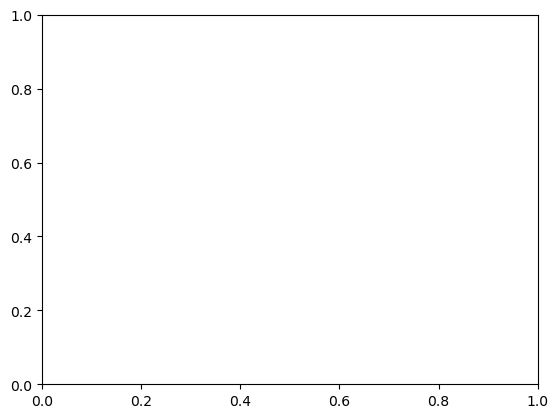

In [93]:
#plt.plot(joltsData.index, y=joltsData.va)
#plt.show()
plt.plot(joltsData)
plt.show()

In [83]:
plt.plot()

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

## Create Narrative
Narrative here...

## Presentation
presentation images and text in this section...

> The questions you asked? \
The trends you investigated? \
The resulting visualizations and conclusions?

## TODO
- scatter plot the data time by values


------
- read file command (read_fwf) not workng
- clean data before EDA
